In [1]:
from PIL import Image, ImageDraw
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, filters, metrics, util

<Figure size 432x288 with 0 Axes>

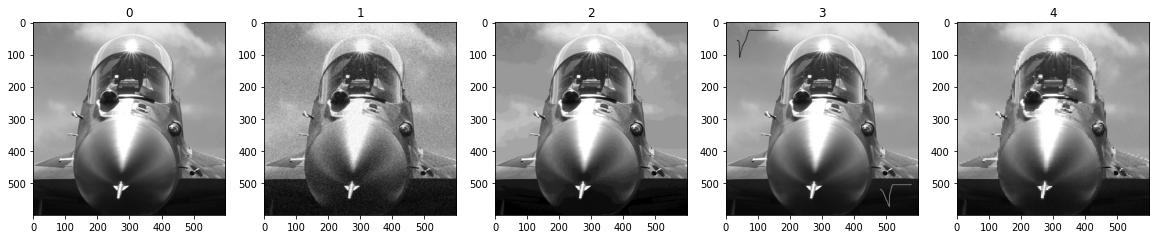

In [2]:
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(20, 20)
)

ax1.set_title('0')
ax2.set_title('1')
ax3.set_title('2')
ax4.set_title('3')
ax5.set_title('4')


image0 = cv2.imread("test2_0.jpg") #Открываем изображение. 
# image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image1 = cv2.imread("test2_1.jpg") #Открываем изображение. 
# image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
image2 = cv2.imread("test2_2.jpg") #Открываем изображение. 
# image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
image3 = cv2.imread("test2_3.jpg") #Открываем изображение. 
# image4 = cv2.cvtColor(image4,cv2.COLOR_BGR2GRAY)
image4 = cv2.imread("test2_4.jpg") #Открываем изображение. 
# image5 = cv2.cvtColor(image5,cv2.COLOR_BGR2GRAY)


ax1.imshow(image0, cmap='gray')
ax2.imshow(image1,cmap='gray')
ax3.imshow(image2,cmap='gray')
ax4.imshow(image3,cmap='gray')
ax5.imshow(image4,cmap='gray')


plt.show()

In [3]:
#PSNR до фильтрации
psnrBeforeImage1 = cv2.PSNR(image0, image1)
psnrBeforeImage2 = cv2.PSNR(image0, image2)
psnrBeforeImage3 = cv2.PSNR(image0, image3)
psnrBeforeImage4 = cv2.PSNR(image0, image4)

print("PSNR для 1-го изображения, до фильтрации =", round(psnrBeforeImage1, 2))
print("PSNR для 2-го изображения, до фильтрации =", round(psnrBeforeImage2, 2))
print("PSNR для 3-го изображения, до фильтрации =", round(psnrBeforeImage3, 2))
print("PSNR для 4-го изображения, до фильтрации =", round(psnrBeforeImage4, 2))

PSNR для 1-го изображения, до фильтрации = 27.98
PSNR для 2-го изображения, до фильтрации = 34.46
PSNR для 3-го изображения, до фильтрации = 31.66
PSNR для 4-го изображения, до фильтрации = 26.64


<Figure size 432x288 with 0 Axes>

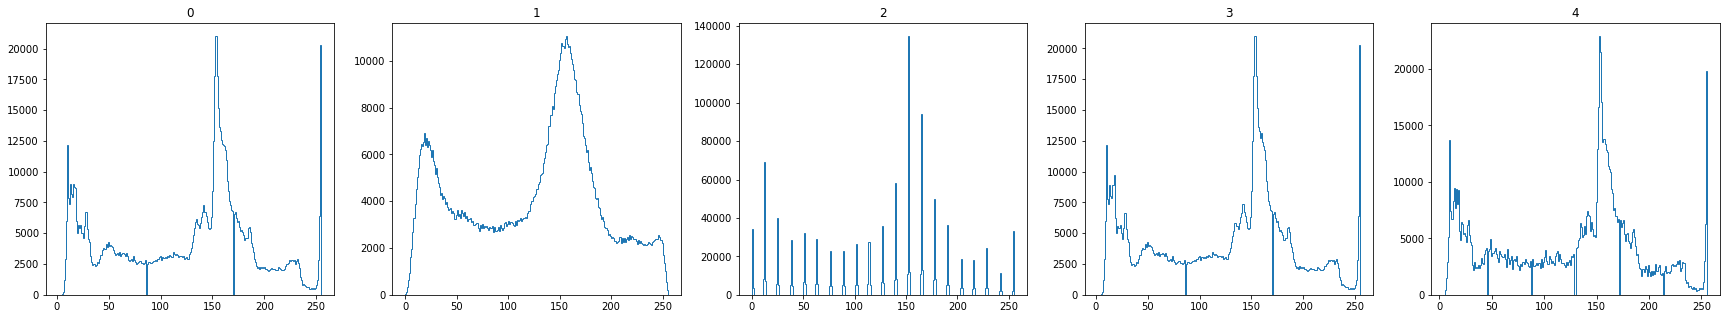

In [4]:
# ax2.hist(image1.ravel(),bins = 256, histtype = 'step' )
#гистограммы изображений
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(30, 5)
)

ax1.set_title('0')
ax2.set_title('1')
ax3.set_title('2')
ax4.set_title('3')
ax5.set_title('4')


ax1.hist(image0.ravel(),bins = 256, histtype = 'step' )
ax2.hist(image1.ravel(),bins = 256, histtype = 'step' )
ax3.hist(image2.ravel(),bins = 256, histtype = 'step' )
ax4.hist(image3.ravel(),bins = 256, histtype = 'step' )
ax5.hist(image4.ravel(),bins = 256, histtype = 'step' )


plt.show()

In [5]:
def showImages(*args):
    fig, axes = plt.subplots(1, len(args))

    for i in range(len(axes)):
        axes[i].imshow(args[i], cmap="gray")

    fig.set_figwidth(10)    
    fig.set_figheight(10)  
    plt.show()

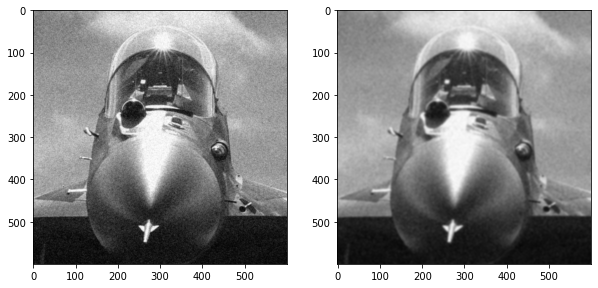

In [6]:
newImage1 = cv2.GaussianBlur(image1, (9, 9), 2)
showImages(image1, newImage1)

/opt/homebrew/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


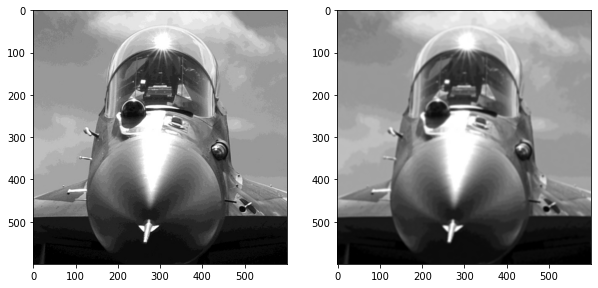

In [7]:
newImage2 = filters.gaussian(image2, 2)
newImage2 = filters.unsharp_mask(filters.median(newImage2), 2)
showImages(image2, newImage2)

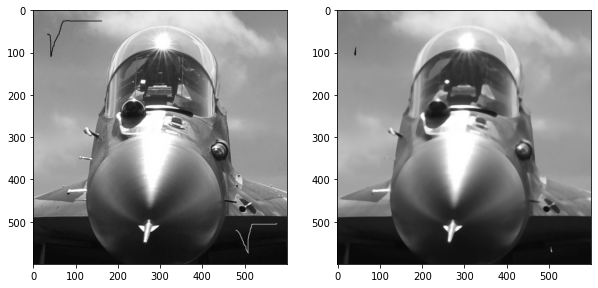

In [8]:
newImage3 = cv2.medianBlur(image3, 7)
showImages(image3, newImage3)

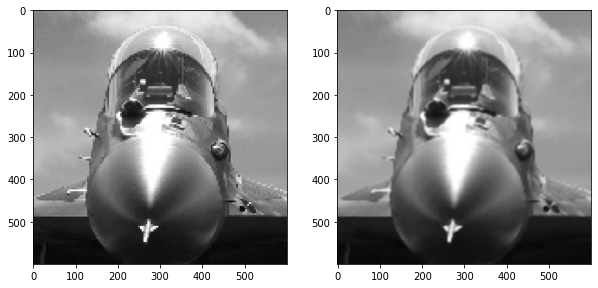

In [9]:
newImageBuf = cv2.blur(image4, (5, 5))
newImage4 = cv2.medianBlur(newImageBuf, 5)
showImages(image4, newImage4)

In [10]:
newImage2 = np.uint8(np.around(image2 * 255))
psnrAfterImage1 = cv2.PSNR(image0, newImage1)
psnrAfterImage2 = cv2.PSNR(image0, newImage2)
psnrAfterImage3 = cv2.PSNR(image0, newImage3)
psnrAfterImage4 = cv2.PSNR(image0, newImage4)
print("PSNR для 1-го изображения, после фильтрации =", round(psnrAfterImage1, 2))
print("PSNR для 2-го изображения, после фильтрации =", round(psnrAfterImage2,2))
print("PSNR для 3-го изображения, после фильтрации =", round(psnrAfterImage3,2))
print("PSNR для 4-го изображения, после фильтрации =", round(psnrAfterImage4,2))

PSNR для 1-го изображения, после фильтрации = 29.1
PSNR для 2-го изображения, после фильтрации = 5.9
PSNR для 3-го изображения, после фильтрации = 30.95
PSNR для 4-го изображения, после фильтрации = 28.38
